In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

In [48]:
network = "VG"
station = "PSAG"
location = "00"
channel = "EHZ"

nslc = "{}.{}.{}.{}".format(network, station, location, channel)

In [47]:
current_dir: str = os.getcwd()
output_directory: str = os.path.join(current_dir, "output", "dsar")
os.makedirs(output_directory, exist_ok=True)

combined_HF_csv: str = r'D:\Projects\dsar\output\HF\combined_0.1-8.0-16.0Hz_VG.PSAG.00.EHZ.csv'
combined_LF_csv: str = r'D:\Projects\dsar\output\LF\combined_0.1-4.5-8.0Hz_VG.PSAG.00.EHZ.csv'

In [37]:
HF = pd.read_csv(combined_HF_csv, names=["datetime", "values"], 
                 index_col='datetime', parse_dates=True)
LF = pd.read_csv(combined_LF_csv, names=["datetime", "values"], 
                 index_col='datetime', parse_dates=True)


In [38]:
HF

,values
datetime,
2017-12-01 00:00:00,0.439914
2017-12-01 00:10:00,0.538841
2017-12-01 00:20:00,0.597672
2017-12-01 00:30:00,0.853629
2017-12-01 00:40:00,0.607109
...,...
2017-12-03 23:10:00,0.846659
2017-12-03 23:20:00,0.925042
2017-12-03 23:30:00,0.846512


In [39]:
LF

,values
datetime,
2017-12-01 00:00:00,1.407755
2017-12-01 00:10:00,1.716330
2017-12-01 00:20:00,1.546221
2017-12-01 00:30:00,2.018578
2017-12-01 00:40:00,1.812334
...,...
2017-12-03 23:10:00,2.538923
2017-12-03 23:20:00,2.393708
2017-12-03 23:30:00,2.398406


In [40]:
df = pd.DataFrame()

In [41]:
df['LF'] = LF['values']
df['HF'] = HF['values']
df['DSAR'] = (LF['values']/HF['values'])

In [42]:
df

,LF,HF,DSAR
datetime,,,
2017-12-01 00:00:00,1.407755,0.439914,3.200070
2017-12-01 00:10:00,1.716330,0.538841,3.185224
2017-12-01 00:20:00,1.546221,0.597672,2.587075
2017-12-01 00:30:00,2.018578,0.853629,2.364702
2017-12-01 00:40:00,1.812334,0.607109,2.985185
...,...,...,...
2017-12-03 23:10:00,2.538923,0.846659,2.998756
2017-12-03 23:20:00,2.393708,0.925042,2.587676
2017-12-03 23:30:00,2.398406,0.846512,2.833282


In [43]:
df = df.dropna()

In [44]:
df = df.apply(lambda col: col.drop_duplicates())

In [45]:
df = df.interpolate('time').interpolate()

In [46]:
df

,LF,HF,DSAR
datetime,,,
2017-12-01 00:00:00,1.407755,0.439914,3.200070
2017-12-01 00:10:00,1.716330,0.538841,3.185224
2017-12-01 00:20:00,1.546221,0.597672,2.587075
2017-12-01 00:30:00,2.018578,0.853629,2.364702
2017-12-01 00:40:00,1.812334,0.607109,2.985185
...,...,...,...
2017-12-03 23:10:00,2.538923,0.846659,2.998756
2017-12-03 23:20:00,2.393708,0.925042,2.587676
2017-12-03 23:30:00,2.398406,0.846512,2.833282


In [49]:
filename = os.path.join(output_directory, "DSAR_{}.csv".format(nslc))
df.to_csv(filename)

<Axes: >

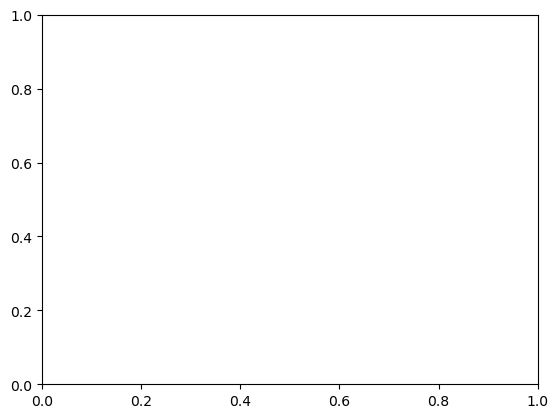

In [50]:
plt.subplot(111)

(1.0, 5.0)

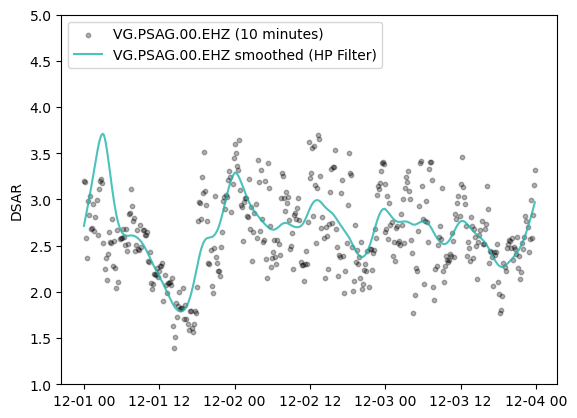

In [61]:
plt.scatter(df.index, df.DSAR, c= 'k', alpha=0.3, s=10, label='{} (10 minutes)'.format(nslc))

# HP filter documentation https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
_,trend = hpfilter(df.DSAR, 1600)
plt.plot(df.index, trend, c='lightseagreen', label='{} smoothed (HP Filter)'.format(nslc), alpha=0.8)

plt.legend(loc=2)
plt.ylabel('DSAR')
plt.ylim(1,5)